# Exercise 1

You are a project manager overseeing two project teams (Team X and Team Y). The project completion times for the last ten projects are measured in weeks. Team X Completion Times: [9,11,10,12,10,11,11,10,12,10] Team Y Completion Times: [8,9,10,11,12,13,14,15,16,47]

a) Compute the mean and median values for each team.

b) Which central tendency statistics is more appropriate for each team?

In [6]:
import numpy as np

team_1 = np.array([9,11,10,12,10,11,11,10,12,10])
team_2 = np.array([8,9,10,11,12,13,14,15,16,47])

# a)

team_1_mean = np.mean(team_1)
team_1_median = np.median(team_1)
team_2_mean = np.mean(team_2)
team_2_median = np.median(team_2)

print("Team 1 mean:", team_1_mean)
print("Team 1 median:", team_1_median)
print("Team 2 mean:", team_2_mean)
print("Team 2 median:", team_2_median)

Team 1 mean: 10.6
Team 1 median: 10.5
Team 2 mean: 15.5
Team 2 median: 12.5


In [7]:
# b) 

print("""Team 1 expresses a normal distribution with mean and median close to each other, so both metrics are appropriate.
For team 2, the distribution is skewed because of an outlier. The mean and median are further from one another,
and the median is a better measure of central tendency.""")

Team 1 expresses a normal distribution with mean and median close to each other, so both metrics are appropriate.
For team 2, the distribution is skewed because of an outlier. The mean and median are further from one another,
and the median is a better measure of central tendency.


# Exercise 2

On the module page, you will find a csv file containing information on all the passengers who boarded the Titanic. Load the csv file into Python – we recommend the Pandas package. 

a) Compute the mean fare paid by passengers.

James is doing historical research for a movie about the disaster, and spends some time looking at pictures of the passengers. He notices that first class passengers appear to be older, and wants to find out whether this observation is true.

b) Compute the Pearson correlation between Age and Pclass in the Titanic dataset.

c) Use linear regression to predict the fare paid based on the passenger age. Plot the trendline
together with the data points (we recommend using PyPlot). Do you think this trend is a close fit?


In [9]:
import pandas as pd

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

# a)
# Drop nan values:
df = df[df['Age'].notna()]
titanic_df = df[df['Fare'].notna()]

# Display the DataFrame
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# b)
mean_fare = titanic_df['Fare'].mean()
print("Mean Fare for All Passengers:", mean_fare)

Mean Fare for All Passengers: 34.694514005602244


In [13]:
# c) 
titanic_df['Age'].corr(titanic_df['Pclass'])

-0.3692260153155173

In [14]:
import numpy as np

# d)

# Extract 'Fare' and 'Age' columns
fare = np.array(titanic_df['Fare']).reshape(titanic_df.shape[0], 1)
age = np.array(titanic_df['Age']).reshape(titanic_df.shape[0], 1)

X = np.append(age, np.ones((age.shape[0], 1)), axis=1)
theta = np.linalg.lstsq(X, fare, rcond=None)[0]

slope = theta[0][0]
intercept = theta[1][0]

# Display the regression coefficients
print(f"Regression Equation: Fare = {slope:.2f} * Age + {intercept:.2f}")

Regression Equation: Fare = 0.35 * Age + 24.30


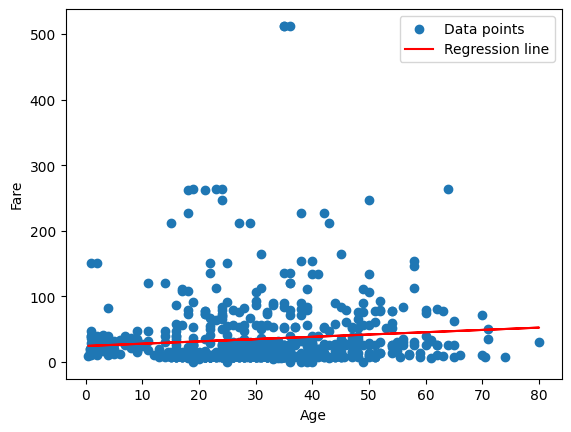

In [15]:
import matplotlib.pyplot as plt

plt.scatter(age, fare, label='Data points')
plt.plot(age, slope * age + intercept, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [ ]:
# One way to show the fitness of the function is to measure the error.
# To give a precise measurement, this would be the way:

residuals = np.linalg.lstsq(X, age, rcond=None)[0]
error = np.sum(residuals)

error

# This error is quite high; the fit is not great.

1.0000000000000024

# Question 3

A headline reads as follows: "A study finds that growing your own vegetables increases CO2 output". Could this headline be misleading? Draw a Bayes net for the relationship suggested by the headline, and propose an alternative, more plausible diagram.

Note: This is an open-ended question.

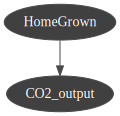

In [19]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian network
bn1 = gum.BayesNet('Vegetables')

# Define the variables
HomeGrown = bn1.add(gum.LabelizedVariable('HomeGrown', 'Grows Vegetables at Home', ['No', 'Yes']))
CO2_output = bn1.add(gum.LabelizedVariable('CO2_output', 'CO2 Output', ['Low', 'High']))

bn1.addArc(HomeGrown, CO2_output)

gnb.showBN(bn1)

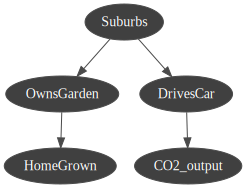

In [20]:
# Create a Bayesian network
bn1 = gum.BayesNet('Vegetables')

# Define the variables
Suburbs = bn1.add(gum.LabelizedVariable('Suburbs', 'Lives in Suburbs', ['No', 'Yes']))
OwnsGarden = bn1.add(gum.LabelizedVariable('OwnsGarden', 'Owns a garden', ['No', 'Yes']))
DrivesCar = bn1.add(gum.LabelizedVariable('DrivesCar', 'Drives Car', ['No', 'Yes']))
HomeGrown = bn1.add(gum.LabelizedVariable('HomeGrown', 'Grows Vegetables at Home', ['No', 'Yes']))
CO2_output = bn1.add(gum.LabelizedVariable('CO2_output', 'CO2 Output', ['Low', 'High']))

bn1.addArc(Suburbs, OwnsGarden)
bn1.addArc(OwnsGarden, HomeGrown)
bn1.addArc(Suburbs, DrivesCar)
bn1.addArc(DrivesCar, CO2_output)

gnb.showBN(bn1)

In [1]:
print("""HomeGrown and CO2_output are both caused by factors further up in the causal chain.

The *choice of structure* and *choice of variables* is another source of subjectivity in statistical reasoning""")

HomeGrown and CO2_output are both caused by factors further up in the causal chain.

The *choice of structure* and *choice of variables* is another source of subjectivity in statistical reasoning
